<a href="https://colab.research.google.com/github/sorennelson/Deep_Learning_with_Python/blob/master/Newswire_MC_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 3.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [0]:
import numpy as np
import tensorflow as tf

import keras
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)
print(np.__version__)

1.13.1
2.2.4
1.16.1


In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
# Map integers to binary array
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# Keras built-in way to one-hot labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Create validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 429us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 69us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 75us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.4291 - acc: 0.

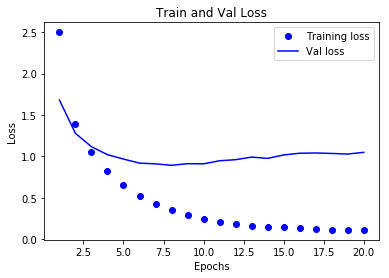

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

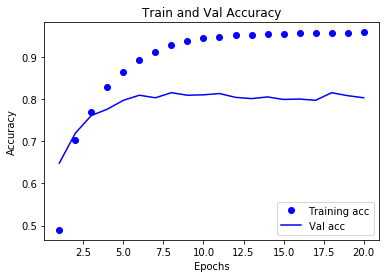

In [17]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.title('Train and Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Above Model overfits the data after about 9 epochs. Thus we run below for 9 epochs then test it on our test data.

In [18]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.1053 - acc: 0.9585 - val_loss: 1.0668 - val_acc: 0.8060
Epoch 2/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.1042 - acc: 0.9580 - val_loss: 1.1236 - val_acc: 0.7940
Epoch 3/9
7982/7982 [==============================] - 1s 69us/step - loss: 0.1059 - acc: 0.9587 - val_loss: 1.1103 - val_acc: 0.7920
Epoch 4/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.1042 - acc: 0.9558 - val_loss: 1.1142 - val_acc: 0.8020
Epoch 5/9
7982/7982 [==============================] - 1s 87us/step - loss: 0.0985 - acc: 0.9592 - val_loss: 1.1059 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 86us/step - loss: 0.1006 - acc: 0.9560 - val_loss: 1.1867 - val_acc: 0.7870
Epoch 7/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.0975 - acc: 0.9577 - val_loss: 1.1353 - val_acc: 0.8080
Epoch 8/9
7982

In [0]:
predictions = model.predict(x_test)

In [23]:
# Real prediction = class with the highest probability
np.argmax(predictions[0])

3